In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 2

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 2s - loss: 1.0268 - accuracy: 0.4062
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 3s 700ms/step - loss: 0.9965 - accuracy: 0.4400 - val_loss: 0.9018 - val_accuracy: 0.5400
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9515 - accuracy: 0.4766
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 152ms/step - loss: 0.9458 - accuracy: 0.4600 - val_loss: 0.8586 - val_accuracy: 0.5400
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9062 - accuracy: 0.4609
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.8992 - accuracy: 0.4467 - val_loss: 0.8202 - val_accuracy: 0.5400
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8652 - accuracy: 0.4609
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.8867 - accuracy: 0.4600 - val_loss: 0.7872 - val_accuracy: 0.5400
Epoch 5/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7838 - accuracy: 0.5156
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.8134 - accuracy: 0.4800 - val_loss: 0.75

Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6234 - accuracy: 0.7031
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 148ms/step - loss: 0.6212 - accuracy: 0.6933 - val_loss: 0.5805 - val_accuracy: 1.0000
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6277 - accuracy: 0.6719
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.6243 - accuracy: 0.6800 - val_loss: 0.5745 - val_accuracy: 1.0000
Epoch 32/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6208 - accuracy: 0.6875
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.6212 - accuracy: 0.6867 - val_loss: 0.5683 - val_accuracy: 1.0000
Epoch 33/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6128 - accuracy: 0.7422
Ep

1/2 [==============>...............] - ETA: 0s - loss: 0.4622 - accuracy: 0.8438
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 152ms/step - loss: 0.4580 - accuracy: 0.8267 - val_loss: 0.3202 - val_accuracy: 1.0000
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4163 - accuracy: 0.8594
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 140ms/step - loss: 0.4205 - accuracy: 0.8600 - val_loss: 0.3078 - val_accuracy: 1.0000
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4284 - accuracy: 0.8438
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.4334 - accuracy: 0.8333 - val_loss: 0.2959 - val_accuracy: 1.0000
Epoch 60/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.3592 - accuracy: 0.9062
Epoch 60: saving

1/2 [==============>...............] - ETA: 0s - loss: 0.2363 - accuracy: 0.9531
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 137ms/step - loss: 0.2458 - accuracy: 0.9467 - val_loss: 0.0970 - val_accuracy: 1.0000
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2627 - accuracy: 0.9141
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 135ms/step - loss: 0.2437 - accuracy: 0.9267 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2115 - accuracy: 0.9297
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 140ms/step - loss: 0.2417 - accuracy: 0.9133 - val_loss: 0.0890 - val_accuracy: 1.0000
Epoch 87/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2081 - accuracy: 0.9453
Epoch 87: saving

1/2 [==============>...............] - ETA: 0s - loss: 0.1078 - accuracy: 0.9844
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 124ms/step - loss: 0.1164 - accuracy: 0.9733 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1636 - accuracy: 0.9297
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 134ms/step - loss: 0.1559 - accuracy: 0.9333 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1824 - accuracy: 0.8984
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 128ms/step - loss: 0.1826 - accuracy: 0.9000 - val_loss: 0.0399 - val_accuracy: 0.9800
Epoch 114/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2132 - accuracy: 0.9141
Epoch 114:

1/2 [==============>...............] - ETA: 0s - loss: 0.1045 - accuracy: 0.9688
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 132ms/step - loss: 0.0966 - accuracy: 0.9733 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1151 - accuracy: 0.9766
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.1082 - accuracy: 0.9800 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1075 - accuracy: 0.9609
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 141ms/step - loss: 0.1227 - accuracy: 0.9533 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 141/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1324 - accuracy: 0.9609
Epoch 141:

1/2 [==============>...............] - ETA: 0s - loss: 0.0669 - accuracy: 0.9844
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 148ms/step - loss: 0.0737 - accuracy: 0.9800 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0785 - accuracy: 0.9609
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 141ms/step - loss: 0.1063 - accuracy: 0.9400 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1075 - accuracy: 0.9531
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 132ms/step - loss: 0.0963 - accuracy: 0.9600 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 168/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1148 - accuracy: 0.9609
Epoch 168:

1/2 [==============>...............] - ETA: 0s - loss: 0.0415 - accuracy: 0.9922
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 148ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1179 - accuracy: 0.9531
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.1272 - accuracy: 0.9533 - val_loss: 0.0174 - val_accuracy: 0.9800
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0571 - accuracy: 0.9766
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 141ms/step - loss: 0.0568 - accuracy: 0.9733 - val_loss: 0.0191 - val_accuracy: 0.9800
Epoch 195/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1200 - accuracy: 0.9531
Epoch 195:

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 66ms/step - loss: 0.0111 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 246ms/step
[0.99885714 0.00114288]
0


# Confusion matrix

2/2 [==============================] - 0s 8ms/step


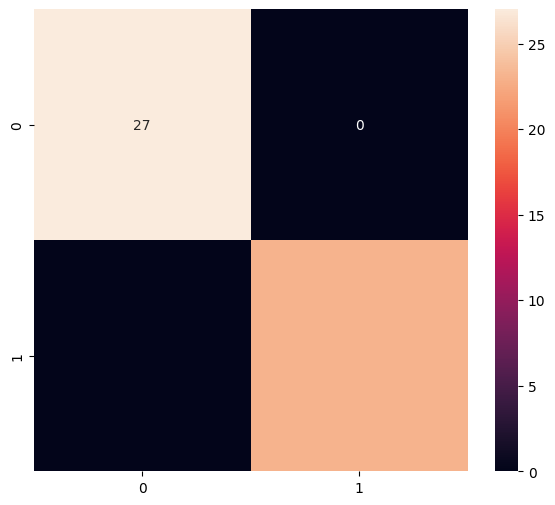

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpkn36s84x\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpkn36s84x\assets


6456

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.99885714 0.00114288]
0
